# NOTE:
The paths are all over the place, as we have just moved it over to our funky little SG2 folder, instead of working in common. This has not been fixed. Good luck, future members of the study group!

# Week 5: Entropy

Today we'll work with some practical examples of entropy using speeches from Danish prime ministers. The goal of today is to give you an intuition of how information theory can be integrated with some of the methods that you've previously learned.

In the file "prime_minister_speeches.csv" you'll find speeches scraped from https://www.stm.dk/statsministeren/taler/ which includes speeches given by Danish prime ministers since 1996, the date of the speech, and the person giving it. 

Your first task is to __use the provided word frequency lists to calculate the (mean) entropy of each speech__. The word frequency lists are in raw counts, so you will need to preprocess them slightly. There a few different frequency lists to choose from which have been estimated on different parts of the Danish Gigaword Corpus - check Table 1 [here](https://www.stm.dk/statsministeren/taler/) for an overview of the data sources. You can either choose the one you think is most relevant, concatenate them into a single file, prune them to only keep top N words, or whatever you think is most sensible. 

### __Exercise 1:__ 

- Plot the entropy over time. Can you spot any immediate patterns? Inspect any speeches that seem suspicious. 


In [8]:
import pandas as pd
import os
import json
from collections import Counter
import math
import seaborn as sns

In [9]:
os.getcwd() #current working directory

'/work/SG2/week 5'

In [10]:
df = pd.read_csv("../../common/w5/speeches_clean.csv")

In [11]:
list_of_dicts = os.listdir(path = "../../common/w5/word_freqs")

In [12]:
total_counter = Counter()

In [13]:
for i in list_of_dicts:
    with open("../../common/w5/word_freqs/"+i, "r") as file:
        file_loaded = Counter(json.load(file))
    total_counter += file_loaded
        
    

In [14]:
total_sum = sum(total_counter.values())

In [15]:
ent_dict = Counter({i: math.log(1/(total_counter.get(i)/total_sum)) for i in total_counter})

$$ent = log\frac{1}{P(x)}$$

In [16]:
text_test = df.head(1)["text"].values

##### NOTE: 
There is a problem with captilization in both datasets.

In [17]:
first_speech = text_test[0].split()

In [18]:
def mean_ent(text):
    speech = text.split()
    running_sum = 0
    running_len = 0
    for i in speech:
        running_sum += ent_dict[i]
        if ent_dict[i]:
            running_len += 1
    return running_sum / (len(speech) - running_len)
    

In [19]:
df.head()

,title,date,url,person,text
0,Statsminister Poul Nyrup Rasmussens åbningsred...,1997-10-07T00:00:00Z,/statsministeren/taler/statsminister-poul-nyru...,Poul Nyrup Rasmussen,Danmark gør en forskel For 25 år siden sagde e...
1,Statsministerens åbning af globaliseringskonfe...,1997-10-28T00:00:00Z,/statsministeren/taler/statsministerens-aabnin...,Poul Nyrup Rasmussen,Stikord Danmark i en global verden Danmark er ...
2,Statsminister Poul Nyrup Rasmussens indlæg ved...,1997-11-11T00:00:00Z,/statsministeren/taler/statsminister-poul-nyru...,Poul Nyrup Rasmussen,"Hr. Præsident, mine damer og herrer, Nye tider..."
3,Statsministerens tale ved åbningen af OSCE ude...,1997-12-18T00:00:00Z,/statsministeren/taler/statsministerens-tale-v...,Poul Nyrup Rasmussen,Uofficiel oversættelse fra engelsk Deres Majes...
4,Statsminister Poul Nyrup Rasmussen nytårstale,1998-01-01T00:00:00Z,/statsministeren/taler/statsminister-poul-nyru...,Poul Nyrup Rasmussen,Godaften. 1998 bliver et skelsættende år for D...


In [20]:
df["mean_ent"] = df["text"].apply(lambda x: mean_ent(x))

In [21]:
df = df.sort_values(by = "date", axis = 0, ascending = True)

<AxesSubplot:xlabel='date', ylabel='mean_ent'>

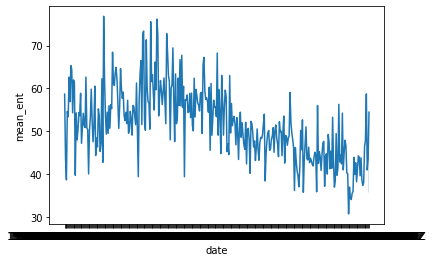

In [22]:
sns.lineplot(data = df, x = "date", y = "mean_ent")

## Kullback-Leibler Divergence

Kullback-Leibler (KL) divergence is a type of _relative entropy_ which is a measure of how _one probability distribution differs from another_. For two discrete probability distributions $P$ and $Q$ (e.g. two binomials) it is defined as follows:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$



Let's look at a quick example.

Imagine we have two distributions, a binomial with $N = 2$ and $f=0.4$ and a uniform distribution with three possible outcomes (0, 1, 2) each with probability $1/3$ 


binomial probabilities: [0.36, 0.48, 0.16000000000000003]


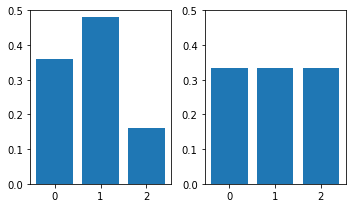

In [23]:
from scipy.stats import binom
import matplotlib.pyplot as plt

N = 2
f = 0.4
r = [0, 1, 2]
binomial_probs = [binom.pmf(n_success, N, f) for n_success in r]
uniform_probs = [1/3, 1/3, 1/3]
print(f"binomial probabilities: {binomial_probs}")

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,3))
axes[0].bar(r, binomial_probs)
axes[0].set_ylim(0, 0.5)
axes[1].bar(r, uniform_probs)
axes[1].set_ylim(0, 0.5)
fig.tight_layout()

To calculate the difference between the two we simply plug the values into our equation:

Divergence from P (the binomial) to Q (the uniform):

\begin{align}
D_\text{KL}(P \parallel Q) &= \sum_{x\in\mathcal{X}} P(x) \ln\left(\frac{P(x)}{Q(x)}\right) \\
 &= 0.36 \log\left(\frac{0.36}{1/3}\right)
+ 0.48 \log\left(\frac{0.48}{1/3}\right)
+ 0.16  \log\left(\frac{0.16}{1/3}\right) \\
&\approx  0.12306
\end{align}

Divergence from Q (the uniform) to Q (the binomail)

\begin{align}
D_\text{KL}(Q \parallel P) &= \sum_{x\in\mathcal{X}} Q(x) \ln\left(\frac{Q(x)}{P(x)}\right) \\
 &= \frac{1}{3} \log\left(\frac{1/3}{0.36}\right)
+ \frac{1}{3} \log\left(\frac{1/3}{0.48}\right)
+ \frac{1}{3} \log\left(\frac{1/3}{0.16}\right) \\
 &\approx 0.14060
\end{align}

Notice that the two are not symmetric: the values change slightly depending on which is the reference distribution.

KL divergence can be useful for many things. For instance, in the context of Bayesian inference by expressing how much information is gained by updating from the prior probability distribution $Q$ to the posterior probability distribution $P$. It can also be used as a loss function (commonly in the form of _cross entropy_) when training multiclass prediction models, as it allows to calculate the difference between the predicted probability distribution and the true distribution. Some clustering methods such as t-SNE also use KL divergence as loss function.

Before we apply it to the speeches, let's build some intuition first.

### __Exercise 2__:

- Implement a function for calculating KL divergence
     - Check that your implementation agrees with scipy.stats.entropy

- Calculate the KL divergence between the following distributions:

    - Binomial(N=10, f=0.1), Binomial(N=10, f=0.5)

    - Binomial(N=10, f=0.1), Binomial(N=10, f=0.3)

    - Binomial(N=10, f=0.1), Binomial(N=10, f=0.1)
    
    - Binomial(N=19, f=0.7), Uniform(0.05)

   

In [24]:
from scipy.stats import entropy
def kl_div(P, Q):
    '''
    Assumes everything.
    Returns something.
    '''
    return sum([P[i] * math.log(P[i]/Q[i]) for i in range(len(P))])

In [25]:
def get_results(P, Q):
    return (kl_div(P,Q), entropy(P,Q))

In [26]:
get_results(binom.pmf(list(range(11)), 10, 0.1), binom.pmf(list(range(11)), 10, 0.5))

(3.6806420716849724, 3.680642071684971)

In [27]:
get_results(binom.pmf(list(range(11)), 10, 0.1), binom.pmf(list(range(11)), 10, 0.3))

(1.163217565860045, 1.163217565860045)

In [28]:
get_results(binom.pmf(list(range(11)), 10, 0.1), binom.pmf(list(range(11)), 10, 0.1))

(0.0, 0.0)

In [29]:
from scipy.stats import uniform

In [30]:
import numpy as np
length = 20

uniform_des = np.array([1/length for i in range(length)])

In [31]:
get_results(binom.pmf(list(range(20)), 19, 0.7), uniform_des)

(0.8891102260354358, 0.8891102260354373)

As you learned in NLP, _topic models_ are a way to calculate a number of latent _topics_ from a set of documents. These topics characterize the content of the documents, and can be viewed as a low-dimensional representation of each document. Topic modelling gives us the probability distribution over the topics for each document, which allows us to use KL divergence to assess the documents by similarity. 

After topic modeling, we want our data to look something like this (assuming 3 topics):

## Topic Models - Introducing Emil's Mega Crazy Super Function (EMCRSF)

In [32]:
import gensim
import warnings
import multiprocessing
multiprocessing.cpu_count()

64

In [57]:
stops = '''ad
af
aldrig
alene
alle
allerede
alligevel
alt
altid
anden
andet
andre
at
bag
bare
begge
bl.a.
blandt
blev
blive
bliver
burde
bør
ca.
da
de
dem
den
denne
dens
der
derefter
deres
derfor
derfra
deri
dermed
derpå
derved
det
dette
dig
din
dine
disse
dit
dog
du
efter
egen
ej
eller
ellers
en
end
endnu
ene
eneste
enhver
ens
enten
er
et
f.eks.
far
fem
fik
fire
flere
flest
fleste
for
foran
fordi
forrige
fra
fx
få
får
før
først
gennem
gjorde
gjort
god
godt
gør
gøre
gørende
ham
han
hans
har
havde
have
hej
hel
heller
helt
hen
hende
hendes
henover
her
herefter
heri
hermed
herpå
hos
hun
hvad
hvem
hver
hvilke
hvilken
hvilkes
hvis
hvor
hvordan
hvorefter
hvorfor
hvorfra
hvorhen
hvori
hvorimod
hvornår
hvorved
i
igen
igennem
ikke
imellem
imens
imod
ind
indtil
ingen
intet
ja
jeg
jer
jeres
jo
kan
kom
komme
kommer
kun
kunne
lad
langs
lav
lave
lavet
lidt
lige
ligesom
lille
længere
man
mand
mange
med
meget
mellem
men
mens
mere
mest
mig
min
mindre
mindst
mine
mit
mod
må
måske
ned
nej
nemlig
ni
nogen
nogensinde
noget
nogle
nok
nu
ny
nyt
når
nær
næste
næsten
og
også
okay
om
omkring
op
os
otte
over
overalt
pga.
på
samme
sammen
se
seks
selv
selvom
senere
ser
ses
siden
sig
sige
sin
sine
sit
skal
skulle
som
stadig
stor
store
synes
syntes
syv
så
sådan
således
tag
tage
temmelig
thi
ti
tidligere
til
tilbage
tit
to
tre
ud
uden
udover
under
undtagen
var
ved
vi
via
vil
ville
vor
vore
vores
vær
være
været
øvrigt'''

In [58]:
stops = stops.split("\n")

In [60]:
import string
puncts = string.punctuation + string.digits #if there are more than one digit, this doesn't work
puncts = [i for i in puncts]

In [61]:
for i in puncts:
    stops.append(i)

In [62]:
text_data = [i.lower().split() for i in df["text"].values]

In [63]:
text_data = [[i for i in sublist if i not in stops] for sublist in text_data]

In [37]:
train_id2word = gensim.corpora.Dictionary(text_data) # Create Corpus texts = data_rdy # Term Document Frequency 

train_corpus = [train_id2word.doc2bow(text) for text in text_data]

In [44]:
with warnings.catch_warnings(): 
    warnings.simplefilter('ignore') 

lda_train = gensim.models.ldamulticore.LdaMulticore(corpus=train_corpus, num_topics=8, id2word=train_id2word, chunksize=100, workers=60, per_word_topics=True) 


In [48]:
testing = lda_train.get_topics()

In [13]:
import pandas as pd

data = {"text" : ["text1...", "text2..", "text3..", "textN..."],
        "topic1" : [0.5, 0.25, 0.10, ".."],
        "topic2" : [0.20, 0.25, 0.60, ".."],
        "topic3":  [0.30, 0.50, 0.30, ".."]}
pd.DataFrame(data)

,text,topic1,topic2,topic3
0,text1...,0.5,0.2,0.3
1,text2..,0.25,0.25,0.5
2,text3..,0.1,0.6,0.3
3,textN...,..,..,..


Notice that each row of topics sum to 1 because it is a probability distribution. 

### __Exercise 3__:

1. Train a topic model on the speeches

2. Get the full topic distribution for each speech

3. Write a function that takes a text/row as input and returns the most similar speech by KL divergence


Hints: 
- While experimenting and trying out your code, work on a subset of the data.

- [Gensim](https://radimrehurek.com/gensim/models/ldamodel.html) makes topic modelling easy.

- You can use the get_document_topics() method of the LdaModel/LdaMulticoreModel to get the topic distribution for a document/speech. Remember to set minimum_probability=0.0 to get the full distribution. 

More things to try:
- Topic models can be greatly improved by preprocessing. Try to lemmatize the data, and remove stopwords and very common/very rare words.

- KL divergence is not symmetric, and is therefore not a true distance metric. [Jensen-Shanon divergence](https://en.wikipedia.org/wiki/Jensen–Shannon_divergence) is a normalized version of KL divergence that is symmetric and can be used as a metric. Try to use Jensen–Shannon divergence instead. 

- Changes in KL divergence over time can be used to calculate some very interesting metrics such as novelty and resonance. Check this [blog post](https://centre-for-humanities-computing.github.io/Nordic-Digital-Humanities-Laboratory/portfolio/news_c19_method/) and corresponding [Github](https://github.com/centre-for-humanities-computing/newsFluxus).